In [992]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Prerequisites:

#### Merge 12-Months (Jan-Dec) of Sales Data into a 'Single' CSV File.

In [181]:
files = [file for file in os.listdir("Desktop/Sales_Data")]
all_files = pd.DataFrame()

for filename in files:
    df = pd.read_csv("Desktop/Sales_Data/" + filename)
    all_files = pd.concat([all_files, df])

all_files.to_csv("Desktop/Sales_Data/all_data.csv", index=False)

In [993]:
all_data = pd.read_csv("Desktop/Sales_Data/all_data.csv", usecols=[*range(0, 6)])
all_data.head(4)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"


# PART A: (Data Cleaning).

#### TASK 1: Find & Drop Rows with ALL NaN Values.

In [994]:
all_data.isna().any(axis=1)
all_data.dropna(how="all", inplace=True)

#### TASK 2: Drop (Unnecessary) Rows in the DataFrame.

In [995]:
unnecessary_rows = all_data.loc[all_data["Order ID"]=="Order ID", :]
all_data.drop(index=unnecessary_rows.index ,axis=0, inplace=True)

#### TASK 3: Convert Columns to their Correct Type (to_numeric, to_datetime).

In [996]:
all_data["Order ID"] = pd.to_numeric(all_data["Order ID"])
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])

#### TASK 4: Augment Data with (Additional) Columns.

In [997]:
all_data["Sales"] = all_data["Price Each"] * all_data["Quantity Ordered"]
all_data["Month"] = all_data["Order Date"].dt.month
all_data["City"] = all_data["Purchase Address"].apply(lambda x: x.split(",")[1] +" ("+ x.split(",")[2].split(" ")[1] +") ") # split then extract.

# PART B: (Data Exploration).

#### QUESTION 1: What was the (best) Month for Sales? How much was (earned) in that Month?

In [1003]:
results = all_data.groupby("Month")["Sales"].sum()
highest_earner = best_month.max()

print("$" + str(round(highest_earner, 2))) # rounded to 2 d.p!

$4613443.34


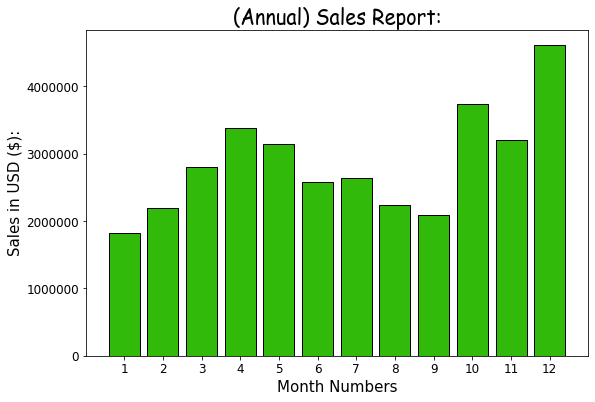

In [1004]:
plt.figure(figsize=(9, 6))

plt.title("(Annual) Sales Report:", fontdict={"fontsize":"20", "fontname":"Comic Sans MS"})
plt.xlabel("Month Numbers", fontdict={"fontsize":"15"})
plt.ylabel("Sales in USD ($):", fontdict={"fontsize":"15"})

months = [month for month, df in all_data.groupby("Month")] # <- .unique() won't preserve the Order so instead do this.
plt.bar(months, results, color="#31BA09", edgecolor="#000000")
plt.xticks(months)
plt.tick_params(labelsize=12)

plt.show()

#### QUESTION 2: What City sold the (most) Products?

In [1005]:
results = all_data.groupby("City")["Sales"].sum()
most_sold_products = results.max()

print("$" + str(round(most_sold_products, 2)))

$8262203.91


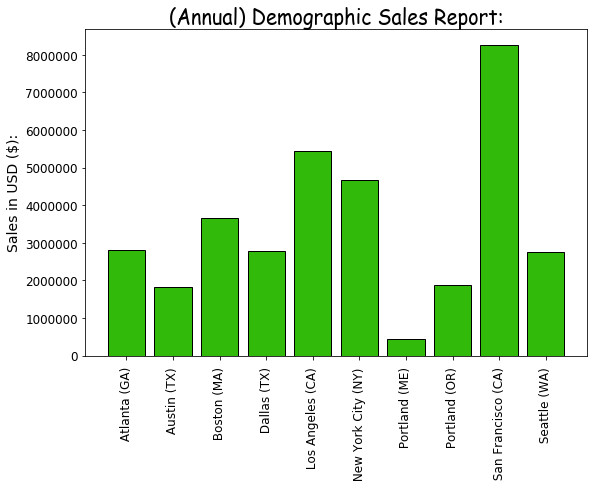

In [1006]:
plt.figure(figsize=(9, 6))

plt.title("(Annual) Demographic Sales Report:", fontdict={"fontsize":"20", "fontname":"Comic Sans MS"})
plt.ylabel("Sales in USD ($):", fontdict={"fontsize":"14"})

cities = [city for city, df in all_data.groupby("City")]
plt.bar(cities, results, color="#31BA09", edgecolor="#000000")
plt.xticks(cities, rotation="vertical")
plt.tick_params(labelsize=12)

plt.show()

#### QUESTION 3: What (time) should we display Advertisemens to (Maximise) the likelihood of Customer’s buying Products?

In [1007]:
all_data["Hour"] = all_data["Order Date"].dt.hour
results = all_data.groupby("Hour")["Sales"].count() # Count for 24-hour period.
best_hour = results.max()

print("Peak-Hour Sales: $" + str(best_hour))

Peak-Hour Sales: $12905


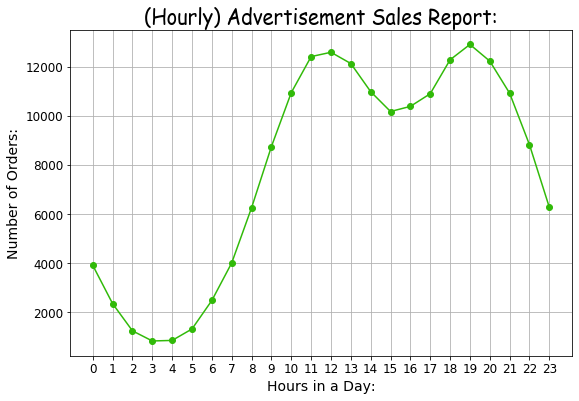

In [1009]:
plt.figure(figsize=(9, 6))

plt.title("(Hourly) Advertisement Sales Report:", fontdict={"fontsize":"20", "fontname":"Comic Sans MS"})
plt.xlabel("Hours in a Day:", fontdict={"fontsize":"14"})
plt.ylabel("Number of Orders:", fontdict={"fontsize":"14"})

hours = [hour for hour, df in all_data.groupby("Hour")]
plt.plot(hours, results, color="#31BA09", marker="o")
plt.xticks(hours)
plt.tick_params(labelsize=12)

plt.grid()
plt.show()

#### QUESTION 4: Which Products are (most oftenly) sold (together)?

In [1010]:
# Referenced: https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = all_data.groupby("Order ID").filter(lambda x: len(x) > 1)

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ', '.join(x))
df = df[["Order ID", "Grouped"]].drop_duplicates()

df.head(4)

,Order ID,Grouped
16,295681,"Google Phone, USB-C Charging Cable, Bose Sound..."
36,295698,"Vareebadd Phone, USB-C Charging Cable"
42,295703,"AA Batteries (4-pack), Bose SoundSport Headphones"
66,295726,"iPhone, Lightning Charging Cable"


In [1011]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for sublist in df["Grouped"]:
    row_list = sublist.split(",")
    count.update(Counter(combinations(row_list, 2)))

count.most_common(10)

[(('iPhone', ' Lightning Charging Cable'), 1005),
 (('Google Phone', ' USB-C Charging Cable'), 987),
 (('iPhone', ' Wired Headphones'), 447),
 (('Google Phone', ' Wired Headphones'), 414),
 (('Vareebadd Phone', ' USB-C Charging Cable'), 361),
 (('iPhone', ' Apple Airpods Headphones'), 360),
 (('Google Phone', ' Bose SoundSport Headphones'), 220),
 (('Vareebadd Phone', ' Wired Headphones'), 143),
 ((' USB-C Charging Cable', ' Wired Headphones'), 120),
 (('Vareebadd Phone', ' Bose SoundSport Headphones'), 80)]

#### QUESTION 5: What Product sold the (most)? Why do you think it sold the most?

In [1014]:
results = all_data.groupby("Product")["Quantity Ordered"].sum()
prices = all_data.groupby("Product")["Price Each"].mean()

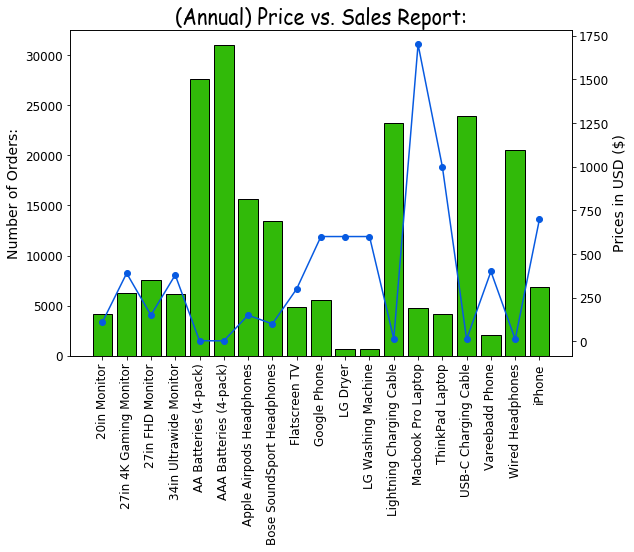

In [1015]:
fig, ax1 = plt.subplots(figsize=(9, 6))
ax2 = ax1.twinx()

ax1.set_title("(Annual) Price vs. Sales Report:", fontdict={"fontsize":"20", "fontname":"Comic Sans MS"})
ax1.set_xticklabels(products, rotation="vertical")
ax1.set_ylabel("Number of Orders:", fontdict={"fontsize":"14"})
ax2.set_ylabel("Prices in USD ($)", fontdict={"fontsize":"14"})

ax1.bar(products, results, color="#31BA09", edgecolor="#000000")
ax2.plot(products, prices, color="#075AE1", marker="o")

ax1.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)

plt.show()